<a href="https://colab.research.google.com/github/Petint/AI-and-DS/blob/main/ai_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-2

In [32]:
# Import all necessary
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.layers import BatchNormalization, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator

# Connect to drive

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dara prep

In [34]:
path = '/content/drive/MyDrive/cropped_images/'
input_shape = (96, 96, 3)
x = []
y = []

for folder in os.listdir(path):
  for images in os.listdir(os.path.join(path, folder)):
    imagepath = os.path.join(path, folder, images)
    image = cv.imread(imagepath)
    image = cv.resize(image, (input_shape[1], input_shape[0]))
    label = folder.replace('_', ' ')
    x.append(image)
    y.append(label)

# Norm

In [35]:
x = np.array(x) / 255.0
y = np.array(y)
# Herbalizer
names = np.unique(y)
print(names)
print(y[60])
mlb = LabelBinarizer()
y = mlb.fit_transform(y)
print(y[60])


['chris evans' 'chris hemsworth' 'mark ruffalo' 'robert downey jr'
 'scarlett johansson']
robert downey jr
[0 0 0 1 0]


# Train - test - validate

In [36]:
x, x_test, y, y_test, =train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val, =train_test_split(x, y, test_size=0.2, random_state=1)

print(x.shape, x_test.shape, y.shape, y_test.shape)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(246, 96, 96, 3) (28, 96, 96, 3) (246, 5) (28, 5)
(196, 96, 96, 3) (50, 96, 96, 3) (196, 5) (50, 5)


# Datagen

In [37]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

# Make Shrek have layers

In [38]:
onion = Sequential()
# Layer 1
onion.add(Conv2D(32, 3, input_shape=input_shape, activation='relu'))
onion.add(MaxPooling2D(3))
onion.add(Dropout(0.25))
# Layer 2
onion.add(Conv2D(64, 3, padding='same', activation='relu'))
onion.add(Conv2D(64, 3, padding='same', activation='relu'))
onion.add(MaxPooling2D())
onion.add(Dropout(0.25))
# Layer 3
onion.add(Conv2D(128, 3, padding='same', activation='relu'))
onion.add(Conv2D(128, 2, padding='same', activation='relu'))
onion.add(MaxPooling2D())
onion.add(Dropout(0.25))
# Layer 4
onion.add(Flatten())
onion.add(Dense(1024, activation='relu'))
# Layer 5
onion.add(Dense(len(mlb.classes_), activation='softmax'))

onion.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 31, 31, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                  

# Fti moddel

In [39]:
onion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
onion.fit(datagen.flow(x_train, y_train, batch_size=128), validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
2/2 [==============================] - 8s 2s/step - loss: 1.9118 - accuracy: 0.1684 - auc: 0.4904 - val_loss: 1.5954 - val_accuracy: 0.2800 - val_auc: 0.5482
Epoch 2/100
2/2 [==============================] - 5s 3s/step - loss: 1.6182 - accuracy: 0.2449 - auc: 0.5259 - val_loss: 1.6053 - val_accuracy: 0.3200 - val_auc: 0.5740
Epoch 3/100
2/2 [==============================] - 5s 3s/step - loss: 1.6070 - accuracy: 0.2143 - auc: 0.5315 - val_loss: 1.6085 - val_accuracy: 0.2000 - val_auc: 0.5464
Epoch 4/100
2/2 [==============================] - 5s 2s/step - loss: 1.6097 - accuracy: 0.1684 - auc: 0.5045 - val_loss: 1.6076 - val_accuracy: 0.2800 - val_auc: 0.5427
Epoch 5/100
2/2 [==============================] - 5s 3s/step - loss: 1.6060 - accuracy: 0.2500 - auc: 0.5322 - val_loss: 1.6025 - val_accuracy: 0.2800 - val_auc: 0.5441
Epoch 6/100
2/2 [==============================] - 5s 2s/step - loss: 1.6037 - accuracy: 0.2449 - auc: 0.5323 - val_loss: 1.5980 - val_accuracy: 0.280

# Eval

In [40]:
loss, acc, auc = onion.evaluate(x_test, y_test, batch_size=100)
print('\nTest accuracy: %.1f%%' % (100.0 * acc))
print('\nTest AUC: %.1f%%' % (100.0 * auc))

1/1 [==============================] - 0s 169ms/step - loss: 0.8241 - accuracy: 0.7143 - auc: 0.9147

Test accuracy: 71.4%

Test AUC: 91.5%


In [41]:
yfit = onion.predict(x_test)
y_prediction = []
for i in yfit:
  i=list(i)
  y_prediction.append(i.index(max(i)))
print(y_prediction)

y_real=[]
for j in y_test:
  j = list(j)
  y_real.append(j.index(max(j)))
print(y_real)

1/1 [==============================] - 0s 248ms/step
[3, 0, 4, 2, 4, 1, 0, 2, 1, 2, 1, 1, 4, 0, 4, 3, 4, 4, 1, 0, 1, 3, 1, 1, 4, 2, 2, 4]
[3, 3, 1, 2, 4, 4, 0, 2, 1, 2, 3, 1, 0, 0, 4, 3, 4, 4, 1, 0, 1, 0, 3, 1, 4, 0, 2, 4]


Text(91.68, 0.5, 'Predicted label')

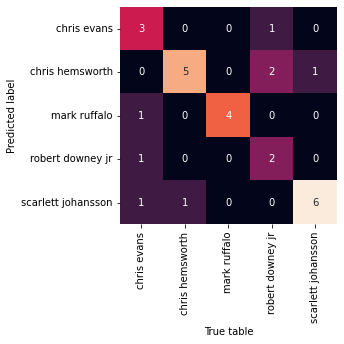

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_real, y_prediction)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False, xticklabels=np.unique(names), yticklabels=np.unique(names))

plt.xlabel('True table')
plt.ylabel('Predicted label')